**This example helps you preprocessing your raw data and run Clever.**

### 1. Create an `AnnData` Object for Your Own Data
You can use `read_fcs` to load an `FCS` file with the following parameters:
- **path:** Path to the `FCS` file to be read.
- **meta_path:** Path to the `CSV` file containing the obs data in AnnData. This file includes observations such as cell types, sample types, and other metadata.
- **exclude_regex:** Regex used to identify columns that do not correspond to markers. The default is set to `fsc|ssc|time|zombie`. You can modify this by adding names to the regex, including the lowercase name after a new `|` according to your data.
- **transform:** Indicates whether arcsinh data transformation processing is required.

In the `example` folder, we provide preprocessed cytometry data and its corresponding metadata. After reading the `example/IMC_data.fcs` and `example/IMC_obs_data.csv` files, you can create an `.h5ad` file that will be used in the **Clever** framework.

#### Example

In [4]:
from utils import *
import anndata
adata = read_fcs(path='example/IMC_data.fcs', meta_path='example/IMC_obs_data.csv', transform=False)
adata.write_h5ad('example/IMC_data.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 32212 × 39
    obs: 'CellNumber', 'ImageNumber', 'Center_X', 'Center_Y', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'NumberOfNeighbors', 'cellID', 'sample', 'sample_type', 'sample_number', 'layer_1_gated', 'celltype_classified', 'celltype_classified_clustering_FS', 'celltype'

### 2. Run **Clever**
Use the following command to run model training and prediction. You can adjust the `i` and `wp` parameters to fit your data:
```
python run.py -data IMC_data -datadir example -outdir result -i x -wp x
```

### 3. Visualization
After prediction, the results are stored in the `result` folder. You can analyze the results using various visualization techniques. For example, a confusion matrix is plotted as follows:

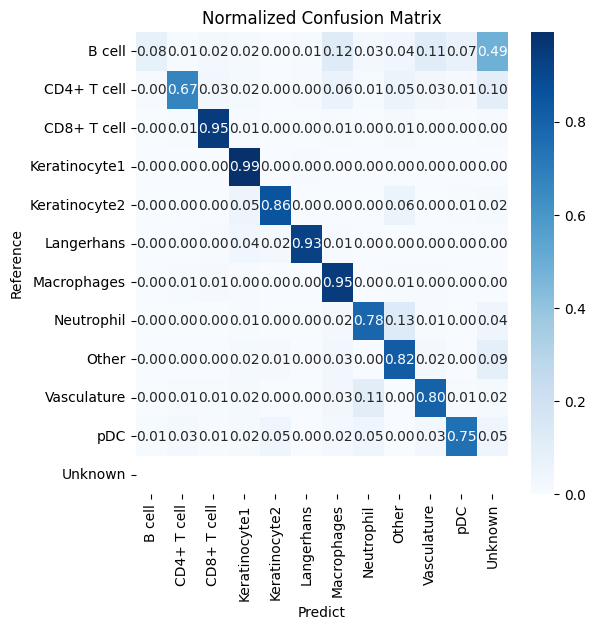

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read result file
result_file_path = 'result/result_i3_wp5.0/Clever_IMC_data_r1_i3_wp5.0_result.csv'
result_clever = pd.read_csv(result_file_path, index_col=0)

yticklabels = list(np.unique(result_clever['reference']))
xticklabels = list(np.unique(result_clever['predict']))
xticklabels.append('Unknown')
yticklabels.append('Unknown')
confusion_df = pd.DataFrame(confusion_matrix(result_clever['reference'],result_clever['predict'],labels=yticklabels))
confusion_normalized = confusion_df.div(confusion_df.sum(axis=1), axis=0)
plt.figure(figsize=(6, 6))
ax = sns.heatmap(confusion_normalized, annot=True,cmap="Blues",fmt ='.2f',xticklabels=yticklabels,yticklabels=yticklabels)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Predict')
ax.set_ylabel('Reference')
ax.set_title('Normalized Confusion Matrix')
plt.show()